# MLF Set1  
#### Name: Frank Feng 冯烯
#### Student ID: 2201212354

In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NaN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# convert .csv file into Pandas dataframe
df_train = pd.read_csv('D:\VSCodeProject\MLF\Set_1\cs-training.csv')

# Fill-in the missing values (nan) with the column means
df_train = df_train.fillna(df_train.mean())

# Get X, y, features
X = df_train.iloc[:,2:]
y = df_train['SeriousDlqin2yrs']
features = X.columns

# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Select the 2 most important features using LogisticRegression with L1 penalty

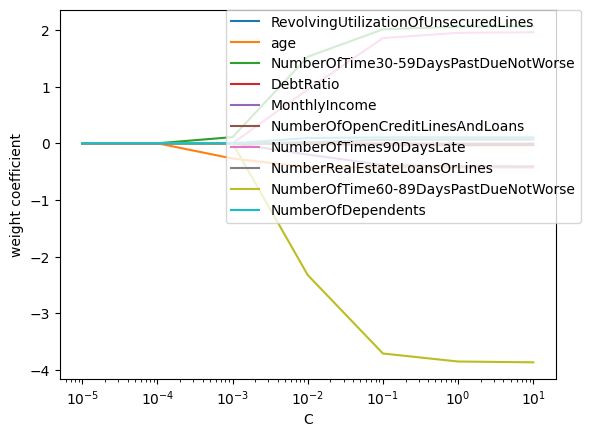

In [3]:
weights, params = [], []
for c in np.arange(-5, 2):
    lr = LogisticRegression(C=10.**c, random_state=1,penalty='l1', solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)
weights = np.array(weights)
for i in range(len(features)):
    plt.plot(params, weights[:,i],label=features[i])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.xscale('log')
plt.show()

As the figure shown, when C is as smaller as about 10E-4, all features other than  `age` and `NumberOfTime30-59DaysPastDueNotWorse` converge to 0.

In [4]:
lr2 = LogisticRegression(C=5e-4, random_state=1,penalty='l1', solver='liblinear', multi_class='ovr')
lr2.fit(X_train_std, y_train)
lr2.coef_

array([[ 0.        , -0.11960945,  0.07212542,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

When C=5E-4, only `age` and `NumberOfTime30-59DaysPastDueNotWorse` matter, so we choose these two variables.

### Using the 2 selected features, apply LR / SVM / decision tree

In [5]:
# Only use the 2 selected features
X_train_selected_features = X_train_std[:,[1,2]]
X_test_selected_features = X_test_std[:,[1,2]]
print(X_train_selected_features.shape)
print(X_test_selected_features.shape)

(105000, 2)
(45000, 2)


#### Apply LR

In [6]:
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, penalty='l1', solver='liblinear', multi_class='ovr')
    lr.fit(X_train_selected_features, y_train)
    lr_pred = lr.predict(X_test_selected_features)
    print('When C is %s , accuracy of LR: %.5f' %(10.**c, accuracy_score(y_test, lr_pred)))

When C is 1e-05 , accuracy of LR: 0.93316
When C is 0.0001 , accuracy of LR: 0.93316
When C is 0.001 , accuracy of LR: 0.93329
When C is 0.01 , accuracy of LR: 0.93336
When C is 0.1 , accuracy of LR: 0.93336
When C is 1.0 , accuracy of LR: 0.93336
When C is 10.0 , accuracy of LR: 0.93336
When C is 100.0 , accuracy of LR: 0.93336
When C is 1000.0 , accuracy of LR: 0.93336
When C is 10000.0 , accuracy of LR: 0.93336


When C >= 0.01, accuracy of LR gets the maximum of 0.93336.

In [7]:
lr_best = LogisticRegression(C=0.01, random_state=1, penalty='l1', solver='liblinear', multi_class='ovr')
lr_best.fit(X_train_selected_features, y_train)

LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')

#### Apply SVM

In [8]:
for g in [0.1,1,10]:
    for c in [0.1,1,10]:
        svm = SVC(kernel='rbf', random_state=1, gamma=g, C=c)
        svm.fit(X_train_selected_features, y_train)
        svm_pred = svm.predict(X_test_selected_features)
        print('When gamma is %s, C is %s , accuracy of SVM: %.5f' %(g, c, accuracy_score(y_test, svm_pred)))

When gamma is 0.1, C is 0.1 , accuracy of SVM: 0.93340
When gamma is 0.1, C is 1 , accuracy of SVM: 0.93333
When gamma is 0.1, C is 10 , accuracy of SVM: 0.93342
When gamma is 1, C is 0.1 , accuracy of SVM: 0.93333
When gamma is 1, C is 1 , accuracy of SVM: 0.93342
When gamma is 1, C is 10 , accuracy of SVM: 0.93340
When gamma is 10, C is 0.1 , accuracy of SVM: 0.93329
When gamma is 10, C is 1 , accuracy of SVM: 0.93338
When gamma is 10, C is 10 , accuracy of SVM: 0.93324


When (gamma=0.1,C-10) or (gamma=1,C=1), accuracy of SVM gets the maximum of 0.93342.

In [9]:
svm_best = SVC(kernel='rbf', random_state=1, gamma=1, C=1)
svm_best.fit(X_train_selected_features, y_train)

SVC(C=1, gamma=1, random_state=1)

#### Apply decision tree

In [10]:
for depth in range(1,10):
    tree_model = DecisionTreeClassifier(criterion='gini',max_depth=depth,random_state=1)
    tree_model.fit(X_train_selected_features, y_train)
    tree_pred = tree_model.predict(X_test_selected_features)
    print('When tree depth is %s, accuracy of decision tree: %.5f' %(depth, accuracy_score(y_test, tree_pred)))

When tree depth is 1, accuracy of decision tree: 0.93316
When tree depth is 2, accuracy of decision tree: 0.93316
When tree depth is 3, accuracy of decision tree: 0.93316
When tree depth is 4, accuracy of decision tree: 0.93324
When tree depth is 5, accuracy of decision tree: 0.93373
When tree depth is 6, accuracy of decision tree: 0.93367
When tree depth is 7, accuracy of decision tree: 0.93369
When tree depth is 8, accuracy of decision tree: 0.93358
When tree depth is 9, accuracy of decision tree: 0.93329


When tree depth is 5, accuracy of decision tree gets the maximum of 0.93373.

In [11]:
tree_model_best = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
tree_model_best.fit(X_train_selected_features, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

### Visualize the classifiers using the `plot_decision_regions` function

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [13]:
X_combined_selected_features = np.vstack((X_train_selected_features, X_test_selected_features))
y_combined = np.hstack((y_train, y_test))
visualize_range = range(105000-5,105000+5)

#### Visualize LR

C:\Users\fengxi\AppData\Local\Temp\ipykernel_2016\1010166887.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\fengxi\AppData\Local\Temp\ipykernel_2016\1010166887.py:40: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


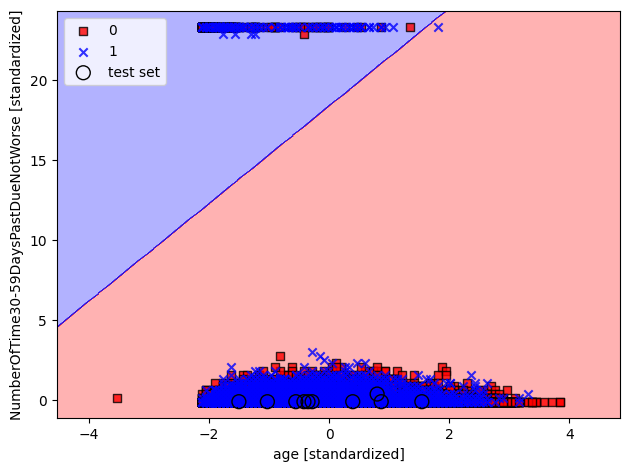

In [14]:
plot_decision_regions(X_combined_selected_features, y_combined, classifier=lr_best, test_idx=visualize_range)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Visualize SVM

C:\Users\fengxi\AppData\Local\Temp\ipykernel_2016\1010166887.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\fengxi\AppData\Local\Temp\ipykernel_2016\1010166887.py:40: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


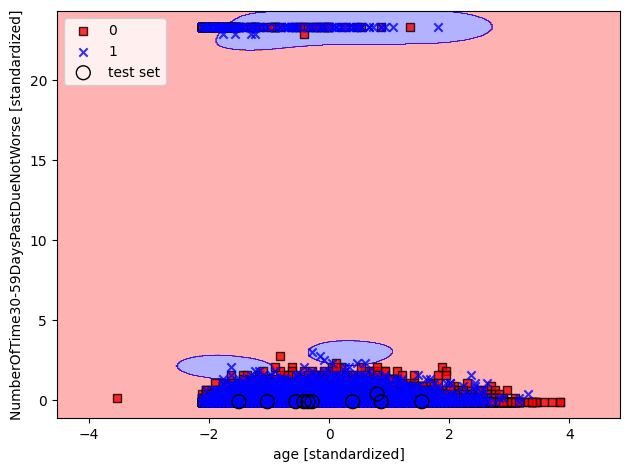

In [15]:
plot_decision_regions(X_combined_selected_features, y_combined, classifier=svm_best, test_idx=visualize_range)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Visualize decision tree

C:\Users\fengxi\AppData\Local\Temp\ipykernel_2016\1010166887.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\fengxi\AppData\Local\Temp\ipykernel_2016\1010166887.py:40: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


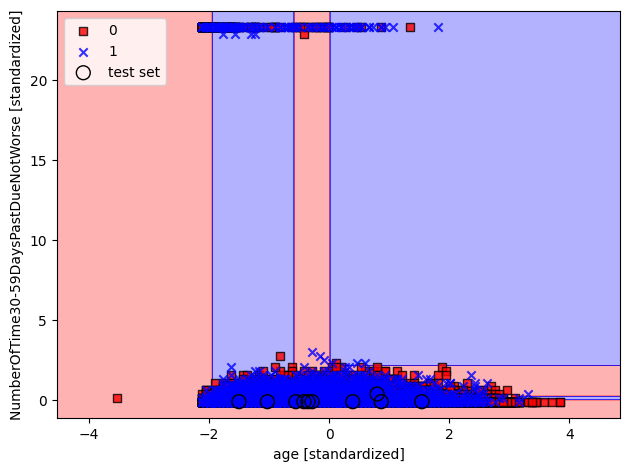

In [17]:
plot_decision_regions(X_combined_selected_features, y_combined, classifier=tree_model_best, test_idx=visualize_range)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()